# Avaliação 1

## Descrição da base de dados escolhida:

### O que signigica cada linha de cada arquivo?
$R:$ 

### Quais são os principais atributos (colunas) e seus tipos?
$R:$ 

## Descrição da base de dados escolhida:

### Teve dificuldades para preparar o dataset para uso? (nomes ruins para colunas, arquivos dos datasets não possuíam boa organização?)
$R:$ 

### Aplicou algum pré-processamento nos dados?
$R:$ Sim, para a Pergunta 1 da Seção de Análise Exploratória 




## Análise Exploratória

In [1]:
# Carregando bibliotecas
import pandas as pd
import os 

### Loading MovieLens DFs

In [2]:
# Getting current working directory
main_path = os.getcwd()

# Building file paths 
path_movielens_movies = main_path + '/movielens/movies.csv'
path_movielens_ratings = main_path + '/movielens/ratings.csv'
path_movielens_tags = main_path + '/movielens/tags.csv'

# Loading files into DFs
df_movies = pd.read_csv(path_movielens_movies)
df_ratings = pd.read_csv(path_movielens_ratings)
df_tags = pd.read_csv(path_movielens_tags)

### Checking DFs

In [3]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### Pergunta 1 – Existe alguma correlação entre o ano de lançamento do filme e sua avaliação média (média de ratings)?

#### Pre processing

In [6]:
# Testing regex logic to get year 
import re

def get_year_from_raw_title(raw_title):
    regex_exp = re.compile('\((....)\)')
    try:
        return int(re.sub('[()]', '', re.search(regex_exp, raw_title).group()))
    except: 
        return None

movie_list_for_test = list(df_movies.sample(n=5).title)

for movie in movie_list_for_test:
    print(f" Raw Title: {movie}\nMovie Year: {get_year_from_raw_title(movie)}\n")

 Raw Title: Wonderland (2003)
Movie Year: 2003

 Raw Title: Scooby-Doo! and the Samurai Sword (2009)
Movie Year: 2009

 Raw Title: Last Train Home (2009)
Movie Year: 2009

 Raw Title: Meatballs 4 (1992)
Movie Year: 1992

 Raw Title: Mighty Joe Young (1998)
Movie Year: 1998



In [7]:
# Testing regex logic to remove year from title 

def remove_year_from_raw_title(raw_title):
    regex_exp = re.compile('\((....)\)')
    try:
        title = re.sub(regex_exp, '', raw_title)
    except: 
        return raw_title
    return title

movie_list_for_test = list(df_movies.sample(n=5).title)

for movie in movie_list_for_test:
    print(f"Old Title: {movie}\nNew Title: {remove_year_from_raw_title(movie)}\n")

Old Title: She's the One (1996)
New Title: She's the One 

Old Title: FairyTale: A True Story (1997)
New Title: FairyTale: A True Story 

Old Title: Ready to Wear (Pret-A-Porter) (1994)
New Title: Ready to Wear (Pret-A-Porter) 

Old Title: Ring of Terror (1962)
New Title: Ring of Terror 

Old Title: Madame Bovary (1991)
New Title: Madame Bovary 



In [8]:
# Pre Procesing Data
# Creating 'year' column and adjusting the title - Movie DF

# Extracting Years
years = []
for title in df_movies['title']:
    years.append(get_year_from_raw_title(title))

# Removing year from title
titles = []
for title in df_movies['title']:
    titles.append(remove_year_from_raw_title(title))

# Creating new DF with title normalized and 'year' column
df_movies_title_normalized_year_column = df_movies[['movieId','title']]
df_movies_title_normalized_year_column['year'] = years
df_movies_title_normalized_year_column['title'] = titles
df_movies_title_normalized_year_column.head()

,movieId,title,year
0,1,Toy Story,1995.0
1,2,Jumanji,1995.0
2,3,Grumpier Old Men,1995.0
3,4,Waiting to Exhale,1995.0
4,5,Father of the Bride Part II,1995.0


In [9]:
# AVG Rate

df_ratings_groupby_movieId_with_mean_rating = df_ratings.groupby('movieId').mean()[['rating']].round(2)
df_ratings_groupby_movieId_with_mean_rating.head()

,rating
movieId,
1,3.92
2,3.43
3,3.26
4,2.36
5,3.07


#### Cálculo

In [10]:
# Merging rating DF with Title and Year DF

df_movie_ratings_merged = pd.merge(df_ratings_groupby_movieId_with_mean_rating, df_movies_title_normalized_year_column, how = 'inner', on = 'movieId')

correlation = df_movie_ratings_merged['rating'].corr(df_movie_ratings_merged['year'])
print(f'Correlation Coefficient: {round(correlation, 2)}')

Correlation Coefficient: -0.11


$R:$ Coeficiente de correlação: -0.11. Há pouco indício de correlação

### Pergunta 2 – Qual o grupo mais disperso, o de usuários que avaliaram ou o de usuários que rotularam filmes?

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Analisando a base de Ratings

In [12]:
# Olhando os dados novamente
df_ratings.info()
df_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
# Contando a quantos filmes cada usuário avaliou para checar sua a diferença da média com mediana e o desvio padrão.
df_ratings_rate_count_by_userid = df_ratings.value_counts('userId').to_frame().reset_index()
df_ratings_rate_count_by_userid.columns =  ['userId','ratedMovies']
user_rate_count_rate_stats = df_ratings_rate_count_by_userid.ratedMovies.describe()
user_rate_count_rate_stats


# min max scaler

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: ratedMovies, dtype: float64

Text(0.5, 0, 'Quantidade de Classificações de Filmes por Usuário')

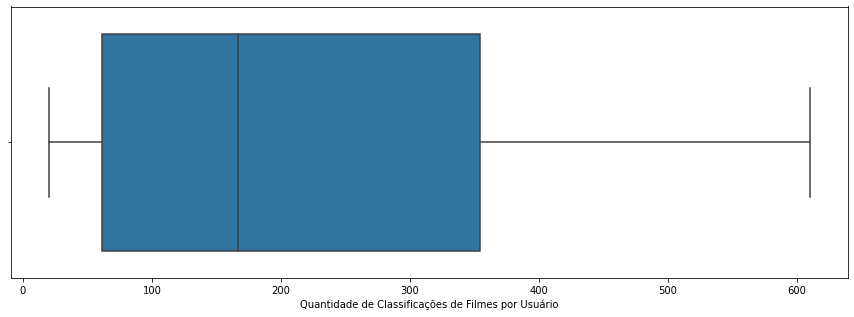

In [14]:
# Avaliação visual dos quartis para entender a distribuição do dado.
plt.figure(figsize=(15, 5))
fig = sns.boxplot(x=user_rate_count_rate_stats, showfliers=False)
plt.xlabel("Quantidade de Classificações de Filmes por Usuário")


#### Analisando a base de Tags

In [15]:
# Olhando a base de tags
df_tags.info()
df_tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [16]:
# Contando a quantos filmes cada usuário avaliou para checar sua a diferença da média com mediana e o desvio padrão.
df_tag_count_by_userid = df_tags.value_counts('userId').to_frame().reset_index()
df_tag_count_by_userid.columns =  ['userId','taggedMovies']
user_tag_count_rate_stats = df_tag_count_by_userid.taggedMovies.describe()
user_tag_count_rate_stats

count      58.000000
mean       63.500000
std       215.118103
min         1.000000
25%         2.250000
50%         4.000000
75%        13.000000
max      1507.000000
Name: taggedMovies, dtype: float64

Text(0.5, 0, 'Quantidade de Tags Atribuídas a Filmes por Usuário')

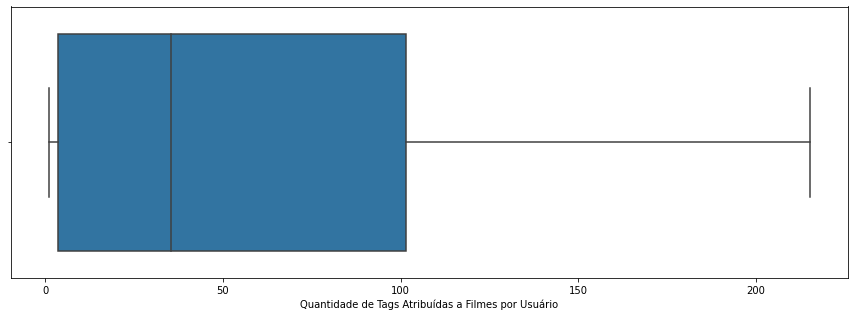

In [17]:
# Avaliação visual dos quartis para entender a distribuição do dado.
plt.figure(figsize=(15, 5))
sns.boxplot(x=user_tag_count_rate_stats, showfliers=False)
plt.xlabel("Quantidade de Tags Atribuídas a Filmes por Usuário")

### Pergunta 3 – Qual a categoria rotulada mais frequente?

In [58]:
df_movies.head(n=1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [59]:
df_movies_genres_exploded = df_movies.replace(to_replace='\|', value=',', regex=True)
df_movies_genres_exploded['genres'] = df_movies_genres_exploded["genres"].str.split(",")
df_movies_genres_exploded = df_movies_genres_exploded.explode('genres').reset_index()
df_movies_genres_exploded.query('movieId == 1')

,index,movieId,title,genres
0,0,1,Toy Story (1995),Adventure
1,0,1,Toy Story (1995),Animation
2,0,1,Toy Story (1995),Children
3,0,1,Toy Story (1995),Comedy
4,0,1,Toy Story (1995),Fantasy


In [73]:
df_movies_exploded_groupby_genres = df_movies_genres_exploded.groupby('genres').count().rename(columns={"index": "frequency"})
df_movies_exploded_groupby_genres = df_movies_exploded_groupby_genres['frequency']
df_movies_exploded_groupby_genres.sort_values(ascending=False)

genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: frequency, dtype: int64

### Pergunta 4 – Como estão distribuídas as avaliações ao longo do tempo?